<center><h1> DSCI 100: Group Project Report </center></h1>
    
<center><h3> Group 27: AJ Montajes [79291373], Alison Marsh [50537430], Michael Yap [47628417], Haowei Lian [17130295] </center></h3>

<hr>

# 1. Introduction

Auditing is the examination of businesses financial records to determine if they align with standard accounting laws and principles (Hooda, 2018). Certain factors of a business or firm, such as historical discrepancy between a financial report and an audit inspection can help auditors identify those that are higher risk for fraudulent activity. This dataset contains information about 777 firms, each of which are either classified as “Fraud” or “Non-fraud” firms. In terms of features, we have 27 numeric features one of which is the binary "Risk"".

The dataset aims to aid in the auditing process, by providing insight into whether a particular firm is “high risk” (in which case auditors would want to visit the firm) or “low risk” (in which case auditors may skip visiting that firm). Some of the risk factors examined in the dataset include discrepancies in reports, historical discrepancy scores, and amounts of money involved in misstatements. With this dataset, we will implement a K-nearest-neighbors classification model to identify \"Fraud\" firms from unseen datasets. 

### 1a. Feature Descriptions

| **Inherent risk factors** |                                                                                               | **Control risk factors** |                                                                                     |
|-----------------------|-----------------------------------------------------------------------------------------------------|----------------------|-------------------------------------------------------------------------------------------|
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Para A value          | Discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore).   | Sector score         | Historical risk score value of the target-unit in the Table 1 using analytical procedure. |
| Para B value          | Discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore). | Loss                 | Amount of loss suffered by the firm last year.                                            |
| Total                 | Total amount of discrepancy found in other reports Rs (in crore).                                   | History              | Average historical loss suffered by firm in the last 10¬†years.                           |
| Numbers                | Historical discrepancy score.                                                                       | District loss      | Historical risk score of a district in the last 10¬†years.                                |
| Money value           | Amount of money involved in misstatements in the past audits.                                       |                      |                                                                                           |


| **Other features**    |                                                                                                     |                      |                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------|----------------------|-------------------------------------------------------------------------------------------|
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Sector ID             | Unique ID of the target sector.                                                                     | Location ID          | Unique ID of the city/province.                                                           |
| Audit Risk            | Total risk score using analytical procedure.                                                        |              |                                           |
| Risk class            | Risk Class assigned to an audit-case. (Target Feature) [0 = non-fraud, 1 = fraud]                                              |                      |                                                                                           |

Regarding datatypes, we have a mostly numeric features in our dataset, some of which (like our proposed target feature) are implicitly categorical. Throughout this report we will make it clear to the reader when and why we change the datatypes of our features

**Note.** The \"Inherent_Risk\" and \"Control_risk\" factors are the aggregated sums of the factors in the categories above.

We will use the K-nearest neighbour algorithm to build the classifier for our data. We want to find the number of neighbours that will give us the most accurate classification results. By first splitting the data into a training set and a test set, we can then split the training data into a sub training set and a validation set to perform a cross validation. Following this we will create a recipe, selecting Risk as our target class with Total, Inherent Risk, Audit Risk, Money Value, History, and Location ID as our predictors. When creating our model using the KNN algorithm, we will set neighbours = tune() so that our cross validation can calculate an accuracy for multiple values of K. We will combine this model with the recipe into a workflow to train the classifier, then visualize the results (which number of neighbours is appropriate) by plotting the accuracy estimates against the number of neighbors. When building our KNN classifier for the dataset, we will use the number of neighbours will give us the most accurate predictions. 

### 1b. Predictive Question
How accurately can we classify the risk of firms using Total, Inherent Risk, Audit Risk, Money Value, History, and Location ID as predictors in a KNN model?

### 1c. Predictor and Algorithm Justification
**KNN:** We have chosen the K-Nearest Neighbors (KNN) algorithm for the following reasons. The simplicity and intuitive nature of KNN make it a useful tool for recognizing complex patterns in datasets, particularly where relationships between variables are non-linear, as in ours. We value KNN's approach of not requiring any assumptions about the underlying data distribution, which is a significant advantage in the unpredictable realm of fraud detection. The flexibility of KNN in feature selection and its adaptability to various distance metrics enable us to effectively capture the intricacies in our multi-dimensional data, which includes variables like total, inherent risk, and audit risk. We also find KNN's robustness against noisy data and its effectiveness in scenarios with imbalanced classes, a common characteristic in fraud detection, to be particularly beneficial. As a team, we plan to tune the 'k' value and the distance metric carefully, enhancing the model's ability to distinguish between fraudulent and non-fraudulent firms accurately. While we are aware of KNN's limitations, such as sensitivity to irrelevant features and potential computational challenges, we believe its empirical performance in detecting patterns of fraudulent activities makes it a suitable and promising choice for our analysis.

**Total:** The feature "Total," defined as the total amount of discrepancy found in other reports in terms of financial value (Rupees in crore), can be a good predictor for identifying fraudulent firms for several reasons. Firstly, the Total feature directly quantifies the extent of discrepancies found in financial reports. Larger discrepancies could indicate significant financial mismanagement or possible fraudulent activities. Finally, consistent or large discrepancies in financial reporting can be a red flag for auditors and analysts, suggesting a lack of financial integrity or potentially fraudulent activities.

**Inherent Risk:**  By aggregating different inherent risk factors, Inherent Risk offers a more comprehensive and nuanced view of the risks inherent in a firm's operations and financial activities. This holistic view is crucial in detecting areas where the potential for fraud is higher. Moreover, Inherent Risk is not limited to a single aspect of the business but encompasses various elements such as transaction types, industry-specific risks, complexity of financial reporting, and susceptibility to error or fraud in different accounts or transactions. Finally, a summative measure of inherent risk takes into account the complexities and specifics of a firm's operations. Different businesses have unique risk profiles based on their market, size, complexity, and other operational factors.

**Audit Risk:** Total risk score using analytical procedure. In this context, audit risk is quantified as a composite score derived from analytical procedures. Analytical procedures in auditing involve evaluating financial information by analyzing plausible relationships among both financial and non-financial data. A high score in this context might indicate anomalies or inconsistencies in the financial data that are not explained by normal business operations, thereby suggesting potential fraudulent activities.

**Money Value:**  Money value, in this context, directly quantifies the extent of financial discrepancies found in past audits. Larger amounts involved in misstatements could indicate more severe financial irregularities, suggesting a higher propensity for or tolerance of fraudulent activities within the firm.

**History:** A history of consistent losses over a decade might indicate underlying issues in a firm's financial stability or business model. While losses themselves are not direct indicators of fraud, persistent financial distress can sometimes pressure companies into engaging in fraudulent activities to mask their poor performance or to attract investment.

**Location ID:** The geographical location of a firm can influence its likelihood of engaging in fraud. This might be due to various factors such as local economic conditions, regulatory environments, or cultural attitudes towards business practices. Some locations might have higher instances of fraud due to these factors.

In summary, these predictors are chosen because they collectively give a comprehensive view of the various risk factors associated with a firm's operations, financial reporting, historical behavior, and environment. Each factor contributes a different dimension of risk, and together they provide a multifaceted approach to predicting the likelihood of fraudulent behavior in firms.

### 1d. Expected Outcomes and Significance 

From our work, we expect to find that Total, Inherent Risk, Audit Risk, Money Value, History, and Location ID are strong predictors of whether or not a firm is fraudulent (>80% accuracy). We expect to find a method to accurately classify the unclassified firms as fraudulent or non-fraudulent firms. Our findings will reduce the workload for auditors by helping them easily classify firms into risky or non-risky, making their auditing process more efficient. Our findings may also reveal which factors are the most important to predicting the riskiness of various businesses and firms. Furthermore, our findings could help provide a guideline for companies to be audited on what activities and processes to avoid. 

Future work could also be done into classifying firms in good financial health and whether or not fraudulent activities are correlated with a firm's financial health. Another future question we could answer is whether or not these findings hold outside of India. Are the predictors that we used here equally effective in say the USA or Canada?

<br>
<hr>

# 2. Methods and Results

## 2.a Loading Libraries
Throughout out this project, we will be employing the same libraries used in lectures.

In [1]:
install.packages("kknn")
install.packages("gridExtra")
install.packages("GMDH2")
library(tidyverse)
library(repr)
library(tidymodels)
library(GMDH2)
library(RColorBrewer)
library(gridExtra)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘plotly’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4

### 2b. Reading Data & Reproducibility
Here we set our seed so that all psuedorandom functionalities are reproducible. We also read our risk dataset from our github repo using `read_csv`.

In [2]:
set.seed(234)
audit <- read_csv("https://raw.githubusercontent.com/montajesaj1/DSCI100-G27/main/audit_data/audit_risk.csv") 
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


### 2c. Tidying the Data and Changing Data-types
Since we have identified the `Risk` feature as our target, we want to change it's datatype to factor and perhaps the 1's and 0's to classes that are more meaningful. Lets call them "fraud" and "non-fraud". We also want to select the features we will be using as predictors (along with Risk).

In [3]:
audit <- audit |> mutate(Risk = as.factor(Risk), LOCATION_ID = as.factor(LOCATION_ID)) |>
    mutate(Risk = fct_recode(Risk, "Fraud" = "1", "Non-fraud" = "0"))

audit_tidy <- audit |> 
    select(TOTAL, Inherent_Risk, Audit_Risk, Money_Value, History, LOCATION_ID, Risk)

head(audit_tidy)

TOTAL,Inherent_Risk,Audit_Risk,Money_Value,History,LOCATION_ID,Risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
6.68,8.574,1.7148,3.38,0,23,Fraud
4.83,2.554,0.5108,0.94,0,6,Non-fraud
0.74,1.548,0.3096,0.00,0,6,Non-fraud
10.80,17.530,3.5060,11.75,0,6,Fraud
0.08,1.416,0.2832,0.00,0,6,Non-fraud
0.83,2.156,0.4312,2.95,0,6,Non-fraud


### 2d. Exploratory Data Analysis
### Summary Tables

#### **Table 1:** Comparing counts for each class of the Target Feature
The table allows us to check if there are imbalances in class, which may effect the accuracy of the prediction.

In [12]:
table_1 <- audit_tidy |>
    group_by(Risk) |>
    summarize(Count = n())

table_1

Risk,Count
<fct>,<int>
Non-fraud,471
Fraud,305


In this case, there seems to only be mild class imbalance ($\approx$ 60% Non-fraud, $\approx$ 40% Fraud), so for the case of our project we will be using 'accuracy' as our primary performance evaluation metric.

#### **Table 2/3:** Summary Statistics on all Features and Missing Value Counts
Table 2: displays the descriptive statistics for all our numerical features whereas Table 3: displays the missing values in our dataset. In this case, we are only missing values for "money_value". We will need to address this in the future for our model.

In [4]:
summary <- audit |>
    summary()
summary

  Sector_score    LOCATION_ID      PARA_A          Score_A      
 Min.   : 1.85   8      : 76   Min.   : 0.000   Min.   :0.2000  
 1st Qu.: 2.37   19     : 68   1st Qu.: 0.210   1st Qu.:0.2000  
 Median : 3.89   9      : 53   Median : 0.875   Median :0.2000  
 Mean   :20.18   16     : 52   Mean   : 2.450   Mean   :0.3513  
 3rd Qu.:55.57   12     : 47   3rd Qu.: 2.480   3rd Qu.:0.6000  
 Max.   :59.85   5      : 44   Max.   :85.000   Max.   :0.6000  
                 (Other):436                                    
     Risk_A           PARA_B          Score_B...7         Risk_B       
 Min.   : 0.000   Min.   :   0.000   Min.   :0.2000   Min.   :  0.000  
 1st Qu.: 0.042   1st Qu.:   0.000   1st Qu.:0.2000   1st Qu.:  0.000  
 Median : 0.175   Median :   0.405   Median :0.2000   Median :  0.081  
 Mean   : 1.351   Mean   :  10.800   Mean   :0.3131   Mean   :  6.334  
 3rd Qu.: 1.488   3rd Qu.:   4.160   3rd Qu.:0.4000   3rd Qu.:  1.841  
 Max.   :51.000   Max.   :1264.630   Max.   :0.6

In [14]:
missing_values_counts <- audit |>
  select(where(~any(is.na(.)))) |>
  summarise(across(everything(), ~sum(is.na(.)), .names = "missing_count_{.col}"))

missing_values_counts

missing_count_Money_Value
<int>
1


**Note.** There is only one feature missing values `Money_value` 

### 2.e Investigative Plots

#### Plot 1: Scatter Plot [Total vs Inherent Risk]
Displays the relationship betweent total discrepancies in reports and inherent risk.

Warning message:
“Transformation introduced infinite values in continuous x-axis”


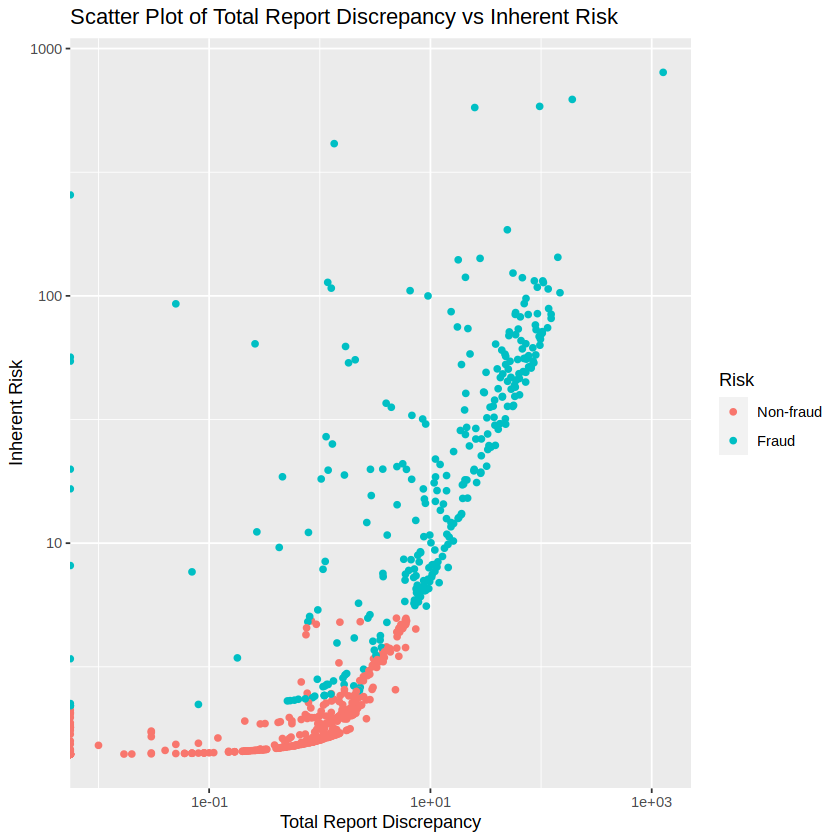

In [7]:
feature_plot1 <- audit |> ggplot(aes(x = TOTAL, y = Inherent_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Inherent Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Inherent Risk')

feature_plot1

Here we have a clear seperation between Fraud and Non-fraud firms, with the majority of Non-fraud firms localizing themselves around the bottom left quadrant. This shows that the relationship between Total and Inherent Risk would likely be advantageous to our classifier.

#### Plot 2: Scatter Plot [Total vs Money Value]
Displays the correlation between total discrepancies in reports and money involved in the misstatement.

In [ ]:
feature_plot2 <- ggplot(audit, aes(x = TOTAL, y = Money_Value)) +
  geom_point(aes(color = Risk), alpha = 0.5) +
  scale_x_log10() + scale_y_log10() +
  ggtitle('Scatter Plot of Total Report Discrepancy vs Money Value') +
  xlab('Total Report Discrepancy') +
  ylab('Money Value')

feature_plot2

Once again we have a visible seperation between Fraud and Non-fraud firms, with the majority of Non-fraud firms similarly localizing themselves around the bottom left quadrant. This shows that the relationship between Total and Money Value would also be advantageous to our classifier. In the case here, there does seem to be some overlap and outliers, which may imply that this is not as strong a predictor relationship as Total and Inherent Risk.

#### Plot 3: Bar Chart [Location ID total counts showing Risk]
Shows the risk associated with firms at a given Location ID.

In [ ]:
feature_plot3 <- audit |>
  group_by(LOCATION_ID, Risk) |>
  summarise(count = n(), .groups = "drop") |>
  group_by(LOCATION_ID) |>
  summarise(total = sum(count), most_frequent_risk = Risk[which.max(count)]) |>
  ungroup() |>
  mutate(LOCATION_ID = reorder(LOCATION_ID, -total)) |>
  ggplot(aes(y = LOCATION_ID, x = total, fill = most_frequent_risk)) +
    geom_bar(stat = "identity", position = "dodge") +
    ggtitle("Bar Chart of Location ID Counts showing Risk") +
    ylab("Location ID") +
    xlab("Count") +
    labs(fill = "Most Frequent Risk")

feature_plot3

This barchart clearly outlines which locations have primarily "Fraud" firms (as outlined by the fill legend). While there isn't any continious patterns to go off of here, the fact that we are able to see which locations tend to be more of a certain Risk class is definitely advantageous to our model.

#### Plot 4: Scatter Plot [Total vs Audit Risk]
Displays the relationship betweent total discrepancies in reports and audit risk.

In [ ]:
feature_plot4 <- audit |> ggplot(aes(x = TOTAL, y = Audit_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Audit Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Audit Risk')

feature_plot4

Much like the Total v.s. Inherent Risk graph we have a clear seperation between Fraud and Non-fraud firms, with the majority of Non-fraud firms localizing themselves around the bottom left quadrant. This shows that the relationship between Total and Audit Risk would likely be advantageous to our classifier.

In [ ]:
feature_plot5 <- audit |> ggplot(aes(x = TOTAL, y = Detection_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Detection Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Detection Risk')

feature_plot1

#### Plot 5: Histogram [History outlining Risk]
Shows the distribution of History and the associated Risk classes.

In [ ]:
feature_plot5 <- audit |> ggplot(aes(x = History, fill = Risk)) +
  geom_histogram(binwidth = 1) +
  labs(title = "Histogram of Historical Losses",
       x = "Average Historical Loss in Last 10 Years",
       y = "Frequency")

feature_plot5

This histogram outlines that as the average historical loss increases, the frequency of Non-fraud firms decreases. As a predictor, History seems to be good for our classifier particularly for higher values of History.

### 2f. Train/Test Split
We will now perform a 75% train test split on our data. 

In [5]:
risk_split <- initial_split(audit_tidy, prop = 0.75, strata = Risk)
risk_train <- training(risk_split)
risk_test <- testing(risk_split) 

### 2g. Constructing and Fitting KNN Model

As mentioned in the introduction, we will be using a KNN model. In this case, we will employ the `tidymodels` library to build our pipeline and specification. Before this, we can take a quick glimpse at the training data to see if there were any adverse effects of our tidying and feature engineering earlier.

In [6]:
glimpse(risk_train)
glimpse(risk_test)

Rows: 581
Columns: 7
$ TOTAL         <dbl> 6.68, 20.53, 55.52, 13.10, 10.96, 40.17, 9.01, 51.64, 28…
$ Inherent_Risk <dbl> 8.574, 18.034, 35.704, 14.392, 9.384, 50.670, 14.492, 71…
$ Audit_Risk    <dbl> 1.7148, 3.6068, 21.4224, 5.7568, 1.8768, 20.2680, 2.8984…
$ Money_Value   <dbl> 3.38, 7.79, 0.96, 10.43, 9.00, 41.28, 14.03, 63.18, 205.…
$ History       <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,…
$ LOCATION_ID   <fct> 23, 8, 8, 8, 13, 37, 37, 37, 3, 4, 4, 14, 5, 20, 19, 19,…
$ Risk          <fct> Fraud, Fraud, Fraud, Fraud, Fraud, Fraud, Fraud, Fraud, …
Rows: 195
Columns: 7
$ TOTAL         <dbl> 4.83, 10.80, 8.51, 19.45, 4.97, 16.20, 0.84, 2.84, 20.36…
$ Inherent_Risk <dbl> 2.5540, 17.5300, 31.7740, 17.2060, 4.3720, 12.0040, 1.56…
$ Audit_Risk    <dbl> 0.51080, 3.50600, 6.35480, 3.44120, 0.87440, 2.40080, 0.…
$ Money_Value   <dbl> 0.940, 11.750, 44.950, 7.340, 1.930, 4.420, 0.007, 0.000…
$ History       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,

We can now build our Model Specification. For our neighbors hyperparameter, we will choose $K = 3$ to begin with and tune it later on depending on our results. We also specify that we are using the kknn engine to form a discrete classification prediction rather than a continuous regression prediction. To do this we specify a recipe with our chosen predictors and predicted class. We then want to impute our one missing money_value instance, by imputing all our numeric predictors with the mean of the feature. We also want to scale and center our numeric predictors to improve numerical stability.

In [7]:
risk_recipe <- recipe(Risk ~ Inherent_Risk + Audit_Risk + TOTAL + Money_Value + History + LOCATION_ID, data = risk_train)

risk_recipe <- risk_recipe |>
  step_impute_mean(all_numeric_predictors()) |>
  step_dummy(all_nominal(), -all_outcomes()) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())  
risk_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          6

Operations:

Mean imputation for all_numeric_predictors()
Dummy variables from all_nominal(), -all_outcomes()
Scaling for all_numeric_predictors()
Centering for all_numeric_predictors()

We can now define our initial model specification, we set our engine to "kknn" and specify that we want a "classification" model. In terms of our hyperparamer $K$, we set it = 3 just as a going off point. We will perform cross validation later to optimize our value for $K$.

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


Since we have our recipe and model specified, we can now create a workflow containing both as well as fitting our model to the training data.

In [9]:
knn_fit <- workflow() |>
      add_recipe(risk_recipe) |>
      add_model(knn_spec) |>
      fit(data = risk_train)

knn_fit

Warning message:
“Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24`, `LOCATION_ID_X33`, `LOCATION_ID_X34` and `LOCATION_ID_SAFIDON`. Consider using `step_zv()` to remove those columns before normalizing”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_impute_mean()
• step_dummy()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09810671
Best kernel: rectangular
Best k: 3

Now we can make a prediction on our test data by making a call to predict using our fitted model and the `risk_test` dataframe.

In [10]:
risk_test_predictions <- predict(knn_fit, risk_test) |>
    bind_cols(risk_test)

risk_test_predictions

.pred_class,TOTAL,Inherent_Risk,Audit_Risk,Money_Value,History,LOCATION_ID,Risk
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Non-fraud,4.83,2.554,0.5108,0.94,0,6,Non-fraud
Fraud,10.80,17.530,3.5060,11.75,0,6,Fraud
Fraud,8.51,31.774,6.3548,44.95,0,7,Fraud
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Non-fraud,0.00,1.400,0.2800,0,0,12,Non-fraud
Non-fraud,0.59,1.518,0.3036,0,0,14,Non-fraud
Non-fraud,0.02,1.404,0.2808,0,0,36,Non-fraud


# 3. Results and Model Evaluation

### 3a. Evaluation Metrics of KNN Model

We will be calculating the Accuracy, Precision and Recall of our model to evaluate our model's performance. This will be done using the confMat function from the GMDH2 library. We will then visualize using a bar plot with ggplot2 and RColorBrewer. However, due to our low class imbalance, we will be predominantly focus on accuracy. We can get this by making a call to `metrics` (filtering out accuracy) on our test predictions data comparing Risk to the `.pred_class` from our model.

In [11]:
risk_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8769231


We have a decently performative model with accuracy $\approx$ 88%. Despite this, we still want to look at some other metrics and see if we can further tune our hyperparameter.

#### Confusion Matrix and Additional Metrics
Given that we are facing a binary classification problem, a confusion matrix is useful in determining the nature of our errors. We generate one using the `confMat` function on our test predictions. 

In [12]:
predicted <- risk_test_predictions$.pred_class
true <- risk_test_predictions$Risk
confusion <- confMat(predicted, true)


Confusion Matrix and Statistics 

           reference
data        Non-fraud Fraud
  Non-fraud       112    18
  Fraud             6    59


     Accuracy             :   0.8769
     No Information Rate  :   0.6051
     Kappa                :   0.7353
     Matthews Corr Coef   :   0.7418
     Sensitivity          :   0.9492
     Specificity          :   0.7662
     Positive Pred Value  :   0.8615
     Negative Pred Value  :   0.9077
     Prevalence           :   0.6051
     Balanced Accuracy    :   0.8577
     Youden Index         :   0.7154
     Detection Rate       :   0.5744
     Detection Prevalence :   0.6667
     Precision            :   0.8615
     Recall               :   0.9492
     F1                   :   0.9032 

     Positive Class       :   Non-fraud 



We can see here that not only do we have high accuracy, we also have high recall and f1. Despite this, we do have a marginally worse Precision, but it is not too dissimilar from our accuracy. Precision is calculated as the number of true positives divided by the total number of positive predictions made by the model. Given that we have degree of class imbalance, it would make sense that the precision would be lower since we have a dominating Non-fraud class. (NOTE: This also accounts for our high recall)

#### Creating Data Frame of Required Metrics
To visualise this a little better, let's create a dataframe of our metrics of interest and plot them against each other for clearer comparison.

In [13]:
values <- c(confusion$accuracy, confusion$precision, confusion$recall)
metrics <- names(confusion)

# perf_metrics <- tibble(Metric = c(names[2], names[15], names[16]),
#                        Value = values)

perf_metrics <- tibble(Metric = c(metrics[2], metrics[15], metrics[16]), 
                       Value = values)
                       
perf_metrics <- perf_metrics |>
                    mutate(Value = round(values, 4))

#### Creating Bar Plot

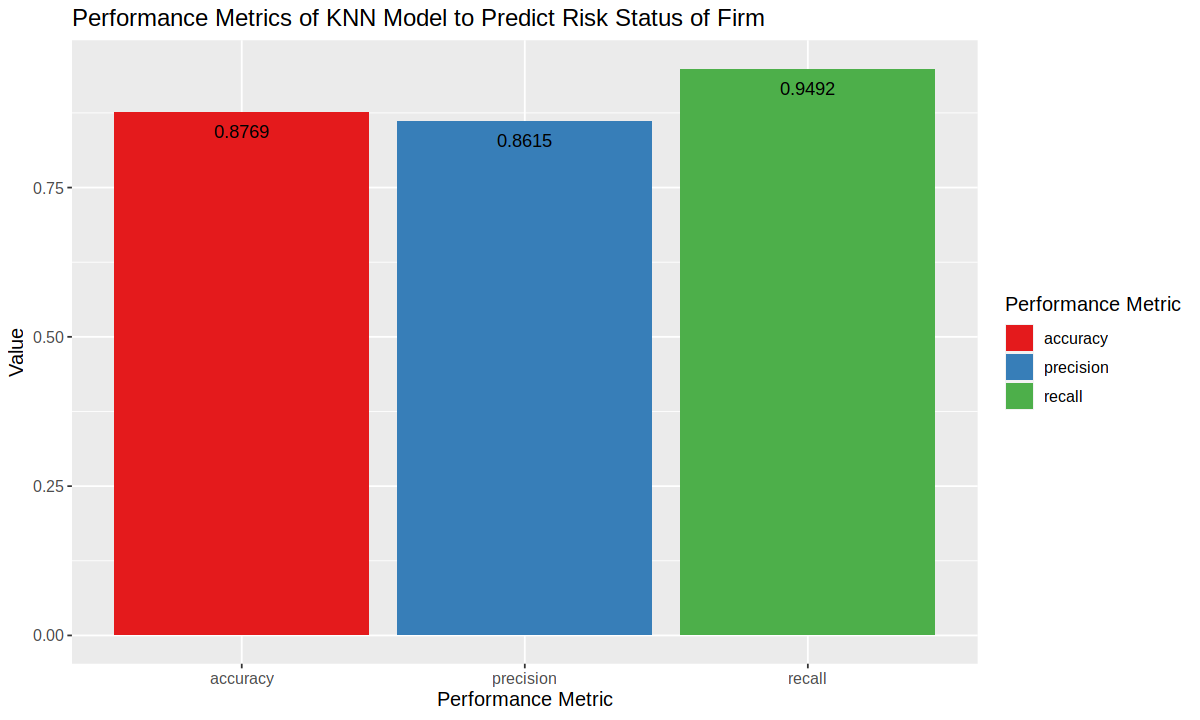

In [14]:
options(repr.plot.width=10, repr.plot.height=6)

perf_plot <- perf_metrics |>
            ggplot(aes(x= Metric, y= Value, fill= Metric)) +
            geom_bar(stat= "identity") +
            geom_text(aes(label= Value), vjust= 2) +
            labs(x= "Performance Metric", y= "Value", fill= "Performance Metric") +
            theme(text = element_text(size= 12)) +
            ggtitle("Performance Metrics of KNN Model to Predict Risk Status of Firm") +
            scale_fill_brewer(palette= "Set1")

perf_plot

### 3.2 Cross Validation

We will run 10 fold cross validation to try to find a more accurate estimate of what our model's accuracy is and how good it is at generalizing to unseen data. After finding this estimate, we will then use it as a benchmark to identify our optimal value of K neighbors in our model.

In [15]:
### Setting up Cross-Validation
risk_vfolds <- vfold_cv(risk_train, v= 10, strata= Risk) 

knn_fit <- workflow() |>
            add_recipe(risk_recipe) |> 
            add_model(knn_spec) |>
            fit_resamples(resamples= risk_vfolds)

c_val_metrics <- knn_fit |>
                    collect_metrics()

c_val_metrics

! Fold01: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold02: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold03: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold04: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X17...

! Fold05: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X23...

! Fold06: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold07: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold08: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold09: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold10: preprocessor 1/1: Column(s) have zero varianc

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8950168,10,0.01038588,Preprocessor1_Model1
roc_auc,binary,0.9433489,10,0.01088829,Preprocessor1_Model1


It seems like we have quite the perfomant model with an mean accuracy of $\approx$ 89.5%. Given the standard error, we can expect our accuracy to fall between 88.5% and 90.5%, which are quite good upper and lower bounds.

### 3c. Tuning for K Neighbors.

Now that we know our model's accuracy is likely somewhere from 88.5% to 90.5%, we can use the average of those two values of 89.5% as a benchmark of what an improvement on our model would be. We will now tune our model using the 10 fold cross validation to then test for all possible k values from 1 to 50 by increments of 1. 

! Fold01: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold02: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold03: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold04: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X17...

! Fold05: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X23...

! Fold06: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold07: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold08: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold09: preprocessor 1/1: Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24...

! Fold10: preprocessor 1/1: Column(s) have zero varianc

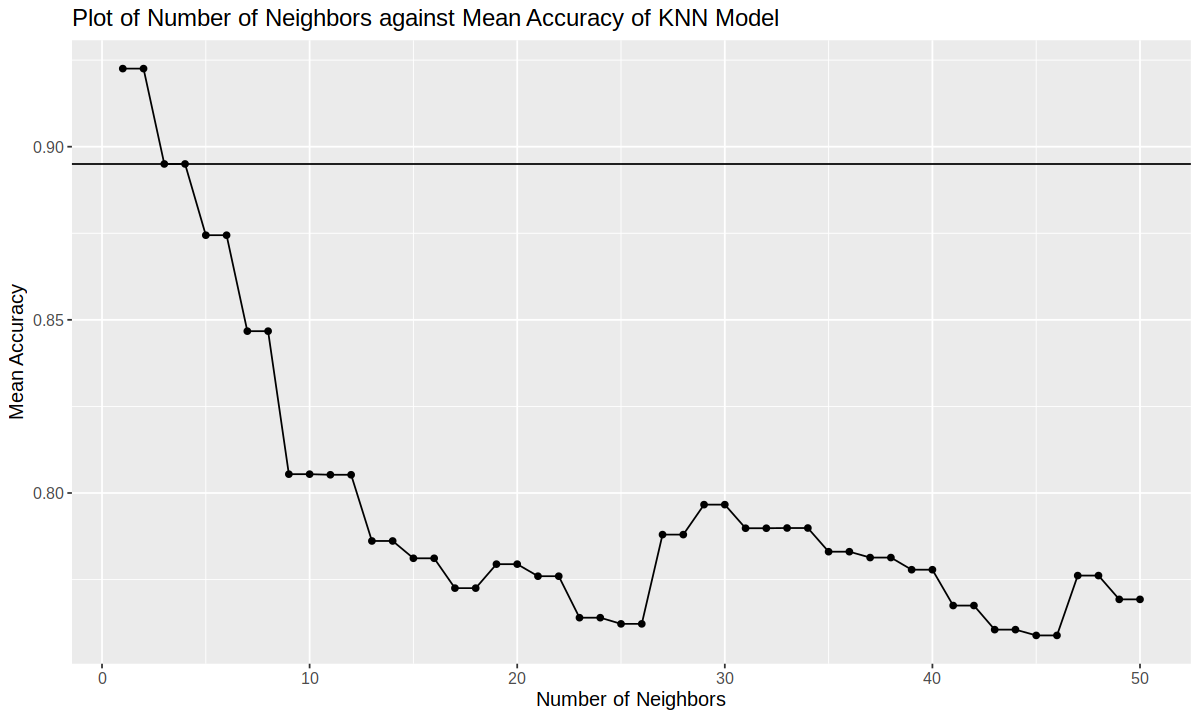

In [16]:
### Setting list of K and model specification
k_vals <- tibble(neighbors = seq(from= 1, to= 50, by=1))

tune_spec <- nearest_neighbor(weight= 'rectangular', neighbors= tune()) |>
                set_engine('kknn') |>
                set_mode('classification')


### Collecting Metrics

knn_results <- workflow() |>
                add_recipe(risk_recipe) |>
                add_model(tune_spec) |>
                tune_grid(resamples= risk_vfolds, grid= k_vals) |>
                collect_metrics()

accuracies <- knn_results |>
                filter(.metric== "accuracy")


### Creating plot for K Neighbors

options(repr.plot.width= 10, repr.plot.height=6)
acc_plot <- accuracies |>
            ggplot(aes(x=neighbors, y= mean)) +
            geom_point() +
            geom_line() +
            labs(x= "Number of Neighbors", y= "Mean Accuracy") +
            ggtitle("Plot of Number of Neighbors against Mean Accuracy of KNN Model") +
            theme(text= element_text(size=12)) +
            geom_hline(yintercept= 0.895)

acc_plot

From this, we can see that a $K$ of 4 performs well at the benchmark. Therefore, we will be selecting this as our chosen value for $K$. You may ask why we select $K = 4$ instead of $K = 3$, and the reason for this is the smaller our value for $K$, the more we run the risk of overfitting. Therefore, in the case that some $K = i$ and $K = j$ s.t. $j > i$ and both $i$ and $j$ have equivalent accuracies, we choose $j$ as our value for $K$.

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 4
  weight_func = rectangular

Computational engine: kknn 


In [18]:
knn_fit_new <- workflow() |>
      add_recipe(risk_recipe) |>
      add_model(knn_spec) |>
      fit(data = risk_train)

knn_fit_new

Warning message:
“Column(s) have zero variance so scaling cannot be used: `LOCATION_ID_X24`, `LOCATION_ID_X33`, `LOCATION_ID_X34` and `LOCATION_ID_SAFIDON`. Consider using `step_zv()` to remove those columns before normalizing”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_impute_mean()
• step_dummy()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1256454
Best kernel: rectangular
Best k: 4

In [19]:
risk_test_predictions <- predict(knn_fit_new, risk_test) |>
    bind_cols(risk_test)

risk_test_predictions

.pred_class,TOTAL,Inherent_Risk,Audit_Risk,Money_Value,History,LOCATION_ID,Risk
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Non-fraud,4.83,2.554,0.5108,0.94,0,6,Non-fraud
Fraud,10.80,17.530,3.5060,11.75,0,6,Fraud
Fraud,8.51,31.774,6.3548,44.95,0,7,Fraud
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Non-fraud,0.00,1.400,0.2800,0,0,12,Non-fraud
Non-fraud,0.59,1.518,0.3036,0,0,14,Non-fraud
Non-fraud,0.02,1.404,0.2808,0,0,36,Non-fraud


In [20]:
risk_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8769231


In [21]:
predicted <- risk_test_predictions$.pred_class
true <- risk_test_predictions$Risk
confusion <- confMat(predicted, true)


Confusion Matrix and Statistics 

           reference
data        Non-fraud Fraud
  Non-fraud       112    18
  Fraud             6    59


     Accuracy             :   0.8769
     No Information Rate  :   0.6051
     Kappa                :   0.7353
     Matthews Corr Coef   :   0.7418
     Sensitivity          :   0.9492
     Specificity          :   0.7662
     Positive Pred Value  :   0.8615
     Negative Pred Value  :   0.9077
     Prevalence           :   0.6051
     Balanced Accuracy    :   0.8577
     Youden Index         :   0.7154
     Detection Rate       :   0.5744
     Detection Prevalence :   0.6667
     Precision            :   0.8615
     Recall               :   0.9492
     F1                   :   0.9032 

     Positive Class       :   Non-fraud 



In [22]:
values <- c(confusion$accuracy, confusion$precision, confusion$recall)
metrics <- names(confusion)

# perf_metrics <- tibble(Metric = c(names[2], names[15], names[16]),
#                        Value = values)

perf_metrics <- tibble(Metric = c(metrics[2], metrics[15], metrics[16]), 
                       Value = values)
                       
perf_metrics <- perf_metrics |>
                    mutate(Value = round(values, 4))

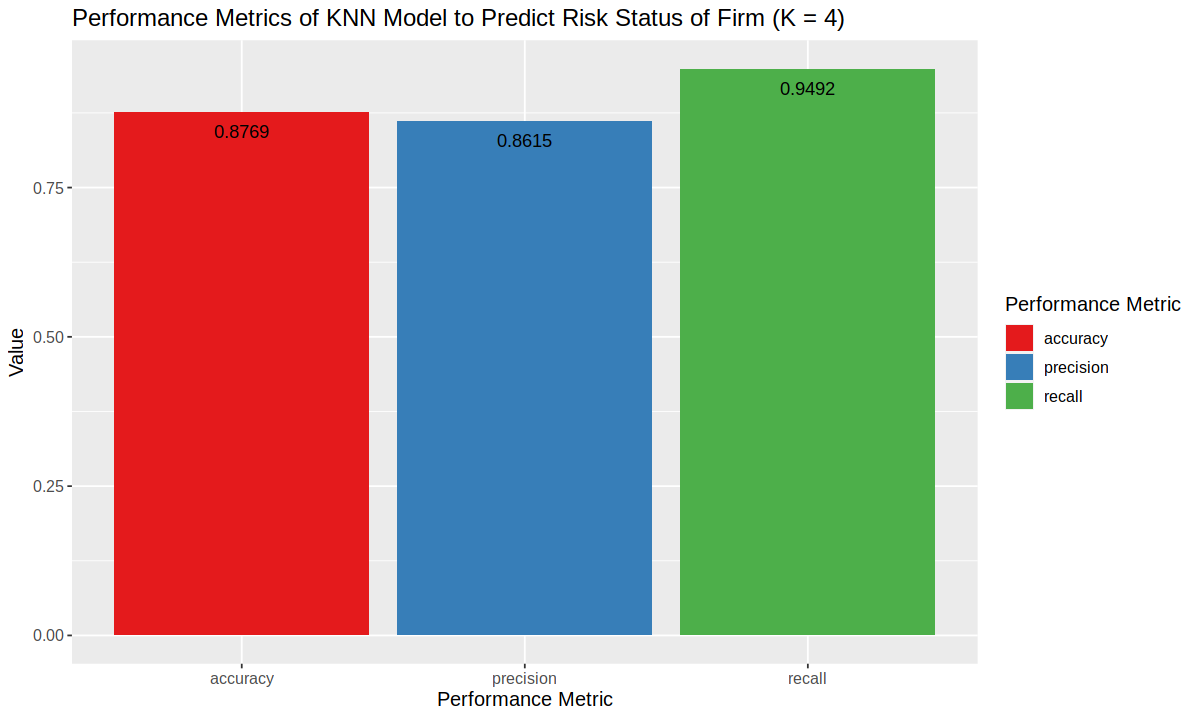

In [23]:
options(repr.plot.width=10, repr.plot.height=6)

perf_plot <- perf_metrics |>
            ggplot(aes(x= Metric, y= Value, fill= Metric)) +
            geom_bar(stat= "identity") +
            geom_text(aes(label= Value), vjust= 2) +
            labs(x= "Performance Metric", y= "Value", fill= "Performance Metric") +
            theme(text = element_text(size= 12)) +
            ggtitle("Performance Metrics of KNN Model to Predict Risk Status of Firm (K = 4)") +
            scale_fill_brewer(palette= "Set1")

perf_plot

We have a final accuracy of $\approx$ 0.877, precision of $\approx$ 0.862, and a recall of $\approx$ 0.949. While this is not an improvement over our old $K =3$, just by being able to increase $K$ we run a lower risk of overfitting to the data.

### 4. Discussion.

In this data analysis, we found that our model is able to classify firms by their risk of fraudulent activity using Total, Inherent Risk, Audit Risk, Money Value, History, and Location ID as predictors, with an accuracy of 0.877, a precision of 0.862 and a recall of 0.949. The K-Nearest Neighbors model constructed was able to more accurately predict the “non-fraud” firms as “non-fraud”, and slightly less accurately predict the “fraud” firms as “fraud”.
Both in our inital evaluation of the model, and after we tuned the model to find the optimal number of neighbours (K = 4), we got the following results. Out of 118 “non-fraud” firms, 112 were predicted as “non-fraud” (giving our recall value of $\approx$ 95%). Out of 77 “fraud” firms, 59 were predicted correctly as “fraud” (0.77%). Therefore, our model makes more mistakes classifying “fraud” firms than “non-fraud” firms. While we expected to have a fairly high accuracy based on the strength of our predictors observed in the preliminary investigative plots, we did not specifically expect to observe the model making one type of mistake more frequently. These findings could potentially lead to more instances of misclassifying “fraud” firms as “non-fraud” and very few instances of misclassifying “non-fraud” firms as “fraud”. The types of misclassifications made by the model could be disadvantageous or advantageous to auditors using the model, depending on what they are trying to accomplish.  

If the auditors using this model are trying to uncover fraud at the highest number of firms possible, misclassifying “fraud” firms as “non-fraud” could be detrimental. Auditors would miss out on the opportunity to audit misclassified high risk firms. However, the misclassifications this model makes could potentially not be an issue if the auditors have very limited time, and are only able to audit a small number of  firms. From our results, only 5% of “non-fraud” firms were classified as “fraud”, so if a firm is classified as “fraud”, it likely is truly at a higher risk of fraudulent activity, and therefore should be at a higher priority for being audited. This would prevent auditors who are in a rush from wasting time auditing “non-fraud” firms misclassified as “fraud” firms. This model could therefore be a beneficial time saver for auditors who are only interested in auditing firms that are almost definitely at a higher risk of partaking in fraudulent activity. The fact that this model allows auditors to save time could also be beneficial to the actual nature of the audit itself, as time pressure has been shown to decrease the quality of audits (Amalia et al., 2018). 

A future question that our results could lead to is: Would our classification model still predict “fraud” vs “non-fraud” with the same accuracy if one or multiple of our predictors were to be removed? We assume that when looking into a firm, some of the predictor variables that we used would be difficult to find or impossible to obtain. For example, the predictor “History” explains the history of a firm’s loss in the past 10 years. But, auditors might want to predict the risk of fraud for a young firm that has not been in operation for 10 years, and therefore cannot have a “History” variable associated with it. In this case, how would the accuracy of our classification model change if the “History” predictor were removed? Another question that arises from the results is: Is this classification model able to be integrated globally? The data used to build this model came from the Auditor General Office (AGO) of India (Hooda et al., 2019). If auditors in Canada wanted to use this model, would the accuracy still be high, enabling Canadian auditors to predict “fraud” and “no-fraud” firms here? Overall, this model is able to classify firms by their risk of fraudulent activity using Total, Inherent Risk, Money Value, History, Audit Risk, and Location ID as predictors, with an accuracy of 0.877, and is better at correctly classifying “non-fraud” firms than “fraud” firms. 

References: 

Ayu Amalia, F., Sutrisno, S., & Baridwan, Z. (2018). Audit quality: Does time pressure influence independence and audit procedure compliance of auditor? Journal of Accounting and Investment, 20(1). https://doi.org/10.18196/jai.2001112 

Audit data. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/475/audit+data 

Hooda, N., Bawa, S., &amp; Rana, P. S. (2018). Fraudulent firm classification: A case study of an external audit. Applied Artificial Intelligence, 32(1), 48–64. https://doi.org/10.1080/08839514.2018.1451032 